In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from wordcloud import WordCloud
from  nltk import FreqDist
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
import re
import nltk

In [191]:
df = pd.read_csv('tweet_product_company.csv')

In [192]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [194]:
#rename columns
df2 = df.rename(columns = {'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment',
                           'tweet_text':'Twitter_Post', 'emotion_in_tweet_is_directed_at':'Twitter_Post_focus'})

In [195]:
df2.isnull().sum()

Twitter_Post             1
Twitter_Post_focus    5802
Sentiment                0
dtype: int64

In [196]:
#FILL Missing values
df2['Twitter_Post_focus'] = df2['Twitter_Post_focus'].fillna("")
df2['Twitter_Post'] = df2['Twitter_Post'].fillna("")

In [197]:
#verification of missing null values is removed
df2.isnull().sum()

Twitter_Post          0
Twitter_Post_focus    0
Sentiment             0
dtype: int64

In [198]:
df2.head()

,Twitter_Post,Twitter_Post_focus,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


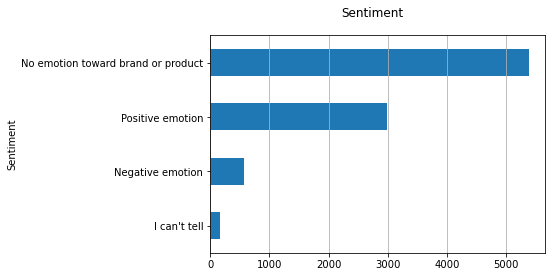

In [199]:
#Univariate Distribution of tweet_emotion_sentiment

fig, ax = plt.subplots()
fig.suptitle("Sentiment", fontsize=12)
df2["Sentiment"].reset_index().groupby("Sentiment").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

### PreProcessing the dataset

In [200]:
#removing handles and hashtags
def remove_usernames(post):
    post = re.sub('@[^\s]+','',post)
    return post
df2['Clean_Twitter_Post'] = df2['Twitter_Post'].apply(remove_usernames)

In [201]:
df2[['Twitter_Post','Clean_Twitter_Post']].head(15)

,Twitter_Post,Clean_Twitter_Post
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,. I have a 3G iPhone. After 3 hrs tweeting at ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Know about ? Awesome iPad/iPhone app that yo...
2,@swonderlin Can not wait for #iPad 2 also. The...,Can not wait for #iPad 2 also. They should sa...
3,@sxsw I hope this year's festival isn't as cra...,I hope this year's festival isn't as crashy a...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on Fri #SXSW: Marissa Mayer (Goog...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,New iPad Apps For #SpeechTherapy And Communic...
6,,
7,"#SXSW is just starting, #CTIA is around the co...","#SXSW is just starting, #CTIA is around the co..."
8,Beautifully smart and simple idea RT @madebyma...,Beautifully smart and simple idea RT wrote a...
9,Counting down the days to #sxsw plus strong Ca...,Counting down the days to #sxsw plus strong Ca...


In [202]:
#Applying Stop words
from nltk.corpus import stopwords
import string


stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

df2['Clean_Twitter_Post2'] = df2['Clean_Twitter_Post'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))

In [203]:
df2[['Clean_Twitter_Post','Clean_Twitter_Post2']].head(15)

,Clean_Twitter_Post,Clean_Twitter_Post2
0,. I have a 3G iPhone. After 3 hrs tweeting at ...,I 3G iPhone. After 3 hrs tweeting #RISE_Austin...
1,Know about ? Awesome iPad/iPhone app that yo...,Know Awesome iPad/iPhone app likely appreciate...
2,Can not wait for #iPad 2 also. They should sa...,Can wait #iPad 2 also. They sale #SXSW.
3,I hope this year's festival isn't as crashy a...,I hope year's festival crashy year's iPhone ap...
4,great stuff on Fri #SXSW: Marissa Mayer (Goog...,"great stuff Fri #SXSW: Marissa Mayer (Google),..."
5,New iPad Apps For #SpeechTherapy And Communic...,New iPad Apps For #SpeechTherapy And Communica...
6,,
7,"#SXSW is just starting, #CTIA is around the co...","#SXSW starting, #CTIA around corner #googleio ..."
8,Beautifully smart and simple idea RT wrote a...,Beautifully smart simple idea RT wrote #holler...
9,Counting down the days to #sxsw plus strong Ca...,Counting days #sxsw plus strong Canadian dolla...


In [204]:
#removing special characters, numbers, punctuations
df2['Clean_Twitter_Post3'] = df2['Clean_Twitter_Post2'].str.replace("[^a-zA-Z#]", " ")

In [205]:
df2[['Clean_Twitter_Post2','Clean_Twitter_Post3']].head(15)

,Clean_Twitter_Post2,Clean_Twitter_Post3
0,I 3G iPhone. After 3 hrs tweeting #RISE_Austin...,I G iPhone After hrs tweeting #RISE Austin...
1,Know Awesome iPad/iPhone app likely appreciate...,Know Awesome iPad iPhone app likely appreciate...
2,Can wait #iPad 2 also. They sale #SXSW.,Can wait #iPad also They sale #SXSW
3,I hope year's festival crashy year's iPhone ap...,I hope year s festival crashy year s iPhone ap...
4,"great stuff Fri #SXSW: Marissa Mayer (Google),...",great stuff Fri #SXSW Marissa Mayer Google ...
5,New iPad Apps For #SpeechTherapy And Communica...,New iPad Apps For #SpeechTherapy And Communica...
6,,
7,"#SXSW starting, #CTIA around corner #googleio ...",#SXSW starting #CTIA around corner #googleio ...
8,Beautifully smart simple idea RT wrote #holler...,Beautifully smart simple idea RT wrote #holler...
9,Counting days #sxsw plus strong Canadian dolla...,Counting days #sxsw plus strong Canadian dolla...


In [206]:
drop = ['Twitter_Post','Clean_Twitter_Post', 'Clean_Twitter_Post2' ]
df3 = df2.drop(drop, axis = 1)

In [207]:
df3.head(5)

,Twitter_Post_focus,Sentiment,Clean_Twitter_Post3
0,iPhone,Negative emotion,I G iPhone After hrs tweeting #RISE Austin...
1,iPad or iPhone App,Positive emotion,Know Awesome iPad iPhone app likely appreciate...
2,iPad,Positive emotion,Can wait #iPad also They sale #SXSW
3,iPad or iPhone App,Negative emotion,I hope year s festival crashy year s iPhone ap...
4,Google,Positive emotion,great stuff Fri #SXSW Marissa Mayer Google ...


In [208]:
stemmer = nltk.SnowballStemmer("english")

def stem (text):
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [209]:
df3['Stem_Post'] = df3['Clean_Twitter_Post3'].apply(stem)

In [210]:
#Applying Tokenization 
from nltk.tokenize import word_tokenize

df3['Final_Post'] = df3['Stem_Post'].apply(word_tokenize)

tokens = df3['Stem_Post'].apply(word_tokenize)

In [211]:
df3[['Clean_Twitter_Post3','Final_Post']].head(15)

,Clean_Twitter_Post3,Final_Post
0,I G iPhone After hrs tweeting #RISE Austin...,"[i, g, iphon, after, hrs, tweet, #, rise, aust..."
1,Know Awesome iPad iPhone app likely appreciate...,"[know, awesom, ipad, iphon, app, like, appreci..."
2,Can wait #iPad also They sale #SXSW,"[can, wait, #, ipad, also, they, sale, #, sxsw]"
3,I hope year s festival crashy year s iPhone ap...,"[i, hope, year, s, festiv, crashi, year, s, ip..."
4,great stuff Fri #SXSW Marissa Mayer Google ...,"[great, stuff, fri, #, sxsw, marissa, mayer, g..."
5,New iPad Apps For #SpeechTherapy And Communica...,"[new, ipad, app, for, #, speechtherapi, and, c..."
6,,[]
7,#SXSW starting #CTIA around corner #googleio ...,"[#, sxsw, start, #, ctia, around, corner, #, g..."
8,Beautifully smart simple idea RT wrote #holler...,"[beauti, smart, simpl, idea, rt, wrote, #, hol..."
9,Counting days #sxsw plus strong Canadian dolla...,"[count, day, #, sxsw, plus, strong, canadian, ..."


In [212]:
#generating different dataframes's by sentiment for wordcloud

dfNaN = df3.loc[df3.Sentiment== 'No emotion toward brand or product']
df_pve= df3.loc[df3.Sentiment== 'Positive emotion']
df_nve = df3.loc[df3.Sentiment== 'Negative emotion']


In [213]:
nan = dfNaN['Final_Post']
pve = df_pve['Final_Post']
nve = df_nve['Final_Post']

all_words = df3['Final_Post']

#list comprehension
#Use map() method for mapping str (for converting elements in list to string) with given iterator, the list. 
nanl = ' '.join(map(str, nan))
pvel = ' '.join(map(str, pve))
nvel = ' '.join(map(str, nve))
allw = ' '.join(map(str, all_words))

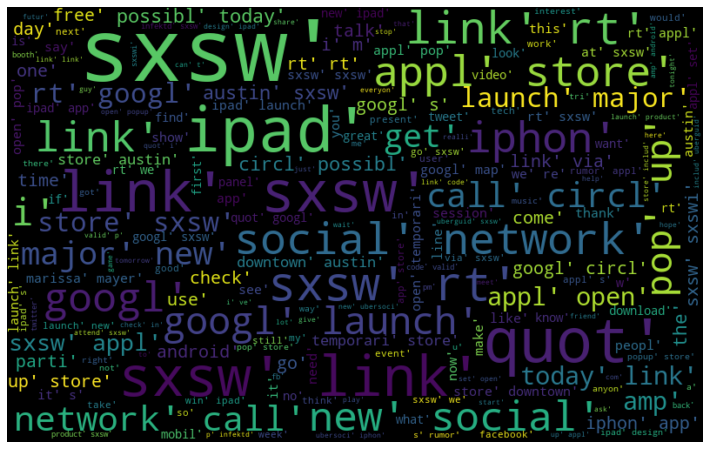

In [214]:
#wordcloud for neutral words
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(nanl)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

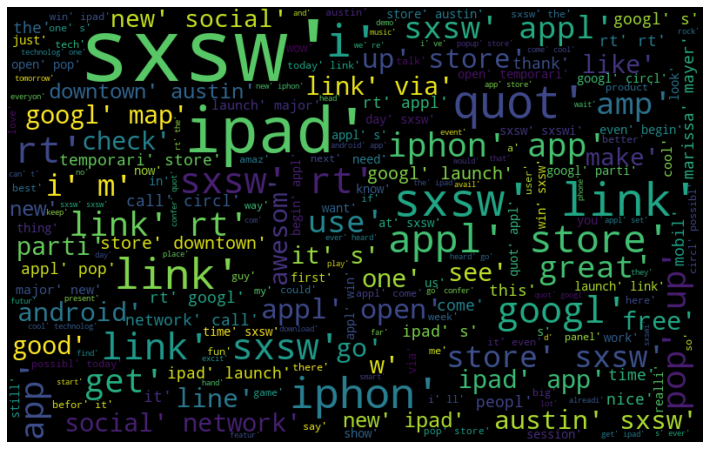

In [215]:
#wordcloud for Positive words
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(pvel)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

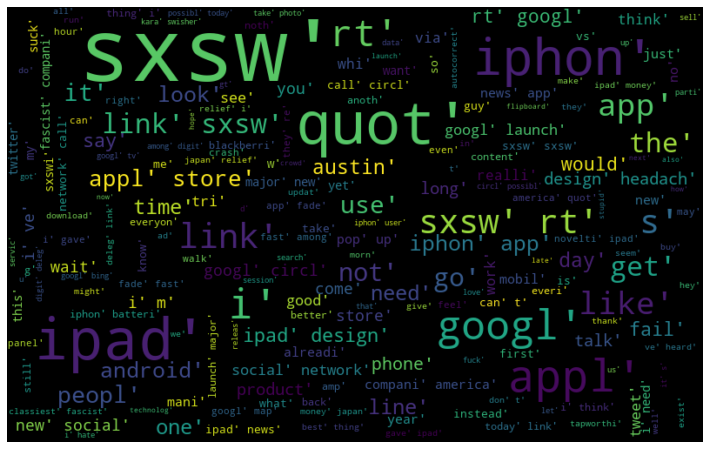

In [216]:
#wordcloud for Negative words
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(nvel)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

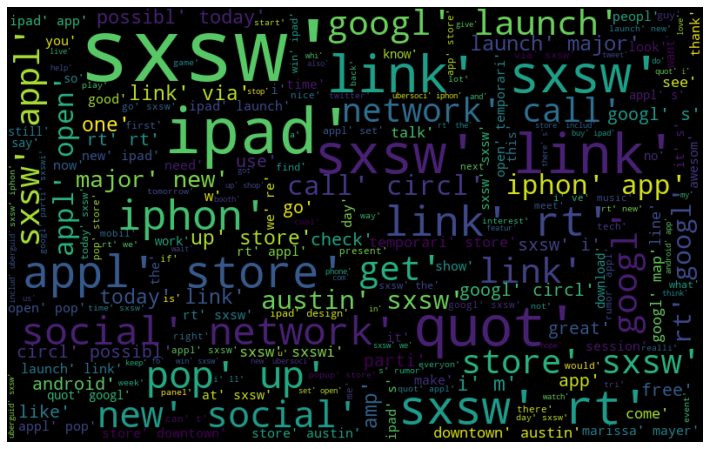

In [217]:
#wordcloud for all sentiments
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(allw)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### This is where the problem originates (below)

In [287]:
df3['Final_Post'].astype(str)
#new = df3['Final_Post']
#X = dir(df3['Final_Post'])
y = df3['Sentiment']
#X = df3['Final_Post']
#X = df3['Final_Post'].ravel()
x = dir(df3['Final_Post'])
#x = df3['Final_Post']

x = x.reshape(-1,1)

AttributeError: 'list' object has no attribute 'reshape'

In [291]:
x = np.array([[x]]).transpose()

In [292]:
y = np.array(y)

print("y shape", y.shape)
print("x shape", x.shape)


y shape (9093,)
x shape (433, 1, 1)


### Text vectorization

In [293]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import BernoulliNB


#cv = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

cv = CountVectorizer(max_features=1000, stop_words='english')
cv = cv.fit_transform(X)


tfdf = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

print("cv size", cv.shape)


cv size (162, 156)


In [294]:
x_train, x_test, y_test, y_train = train_test_split(X, y, random_state=42, test_size=0.05)

ValueError: Found input variables with inconsistent numbers of samples: [162, 9093]

In [275]:
df_train, df_test = model_selection.train_test_split(df3, test_size = 0.3)
#x_train, x_test, y_train, y_test = train_test_split(cv, y, random_state=42, test_size=0.25)
#x_train, x_test, y_test, y_train = train_test_split(cv, y, random_state=42, test_size=0.25)
#x_train, x_test, y_test, y_train = train_test_split(X, y, random_state=42, test_size=0.25)
#x_train, x_test, y_test, y_train = train_test_split(X, y, random_state=42, test_size=0.05)

#print("Train Data size:",len(df_train))
#print("Test Data size:",len(df_test))

y_train = df_train["Sentiment"].values
y_test = df_test["Sentiment"].values
x_train = df_train["Final_Post"].values
x_test = df_train["Final_Post"].values

tfdf.fit(dir(x_train))

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [276]:
#post fitting...transforming data 

x_train = tfdf.transform(dir(x_train))
x_test = tfdf.transform(dir(x_test))

In [277]:
#corpus = dir(df_train["Final_Post"])
#corpus = dir(df_train["Final_Post"])
#cv.fit(corpus)
#tfdf_val = tfdf.fit_transform(corpus).toarray()
x_train = dir(x_train)
x_train = tfdf.fit_transform(x_train).toarray()

x_test = dir(x_test)
x_test = tfdf.fit_transform(x_test).toarray()

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (36100, 1)
x_test shape: (36100, 1)


In [278]:
Len = LabelEncoder()
Len.fit(train_data.Sentiment.to_list())

y_train = Len.transform(train_data.Sentiment.to_list())
y_test = Len.transform(test_data.Sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (6365, 1)
y_test shape: (2728, 1)


In [279]:
#from sklearn.linear_model import PassiveAggressiveClassifier
#model = PassiveAggressiveClassifier()
#model.fit(x_train,y_train)
#model.fit(x_train, X)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [36100, 6365]